In [845]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [846]:
#a modifier
df= pd.read_csv(r"C:\Users\barta\Documents\cours\iaprojets\projet_aa\repo\Projet-AARES-20260202\part_1\data\raw\spotify_dataset_subset.csv")

## data analysis

In [847]:
df.head()

,artist_name,track_name,release_date,genres,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,Marry,Vorglühn Nachglühn,2018-10-12,"['discofox', 'partyschlager', 'schlager']",False,42,0.728,0.936,6,-2.557,1,0.1690,0.036800,0.000000,0.323,0.509,144.968,0lLA33ZtNiWUOB3oATZUbR,174631,4
1,ABBA,Chiquitita,1979,"['europop', 'swedish pop']",False,75,0.500,0.554,9,-8.108,1,0.0354,0.734000,0.000004,0.312,0.372,84.229,762B4bOcXF7I2Y8UlKTyTy,326320,4
2,Drug Squad,Dangerous Trouble,2010-08-09,['deep punk rock'],False,0,0.149,0.802,1,-9.954,1,0.0465,0.187000,0.785000,0.356,0.478,185.689,5TeP9dfDZivCzM20ucyHsy,277053,4
3,Ahmad Jamal,Poinciana,1958-05-23,"['bebop', 'cool jazz', 'jazz', 'jazz piano']",False,0,0.604,0.622,9,-9.277,1,0.0282,0.495000,0.661000,0.873,0.570,97.980,1nTaXD1Kt2qE8Oq92rjdrX,487201,4
4,Korn,Make Me Bad,1999-11-01,"['alternative metal', 'funk metal', 'nu metal'...",True,0,0.527,0.792,11,-6.693,0,0.0363,0.000122,0.037000,0.249,0.424,110.038,0w6VKmDlUJyIqRcJ6hPwLf,235493,4


In [848]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8698 entries, 0 to 8697
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       8698 non-null   object 
 1   track_name        8698 non-null   object 
 2   release_date      8698 non-null   object 
 3   genres            8698 non-null   object 
 4   explicit          8698 non-null   bool   
 5   popularity        8698 non-null   int64  
 6   danceability      8698 non-null   float64
 7   energy            8698 non-null   float64
 8   key               8698 non-null   int64  
 9   loudness          8698 non-null   float64
 10  mode              8698 non-null   int64  
 11  speechiness       8698 non-null   float64
 12  acousticness      8698 non-null   float64
 13  instrumentalness  8698 non-null   float64
 14  liveness          8698 non-null   float64
 15  valence           8698 non-null   float64
 16  tempo             8698 non-null   float64


In [849]:
df.shape

(8698, 20)

info sur la target

In [850]:
df['popularity'].describe()

count    8698.000000
mean       28.857094
std        26.051292
min         0.000000
25%         0.000000
50%        27.000000
75%        51.750000
max        95.000000
Name: popularity, dtype: float64

In [851]:
px.histogram(x=df['popularity'], title='Distribution of Popularity', labels={'popularity': 'Popularity'}, template='plotly_dark')

In [852]:
popularity_without_zeros = df[df['popularity'] > 0]['popularity']
px.histogram(x=popularity_without_zeros, title='Distribution of Popularity (Without Zeros)', labels={'popularity': 'Popularity'}, template='plotly_dark')  

info sur les features

['Marry' 'ABBA' 'Drug Squad' ... 'Yugo Kanno' 'Anlaya Project'
 'Leah McFall']


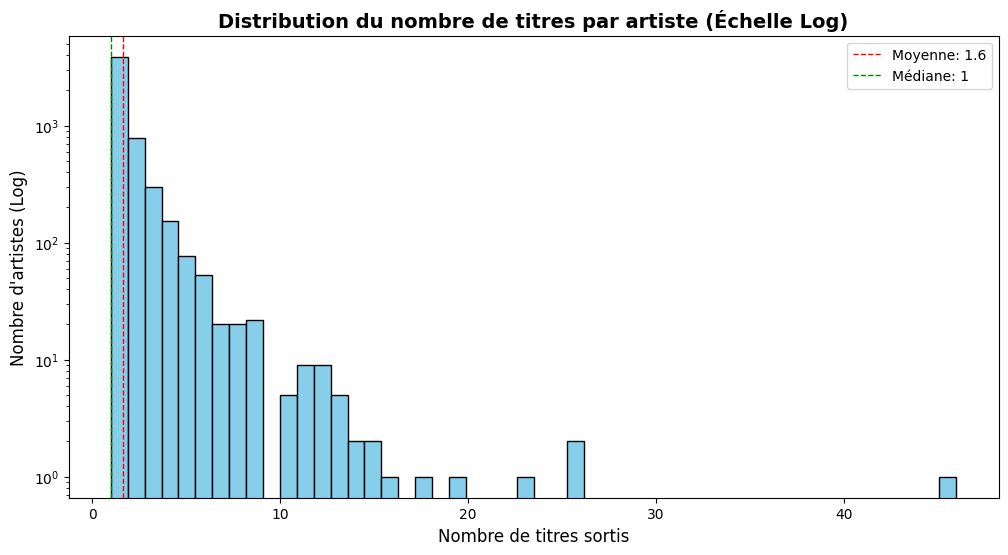

In [853]:
print(df['artist_name'].unique())
nb_son_artiste=df.groupby('artist_name').size()#nb de sons par artist
import matplotlib.pyplot as plt

# Configuration de la taille
plt.figure(figsize=(12, 6))

# Création de l'histogramme
# bins=50 : pour avoir plus de détail
# log=True : CRUCIAL ici car la différence entre 1 chanson et 100 est énorme
# edgecolor='black' : pour bien distinguer les barres
nb_son_artiste.hist(bins=50, color='skyblue', edgecolor='black', grid=False, log=True)

# Ajout de lignes verticales pour la moyenne et la médiane
plt.axvline(nb_son_artiste.mean(), color='red', linestyle='dashed', linewidth=1, label=f'Moyenne: {nb_son_artiste.mean():.1f}')
plt.axvline(nb_son_artiste.median(), color='green', linestyle='dashed', linewidth=1, label=f'Médiane: {nb_son_artiste.median():.0f}')

# Titres et labels explicites
plt.title("Distribution du nombre de titres par artiste (Échelle Log)", fontsize=14, fontweight='bold')
plt.xlabel("Nombre de titres sortis", fontsize=12)
plt.ylabel("Nombre d'artistes (Log)", fontsize=12)
plt.legend()

# Affichage
plt.show()

il y a principalement des artistes avec qu'un seul son, et 1 artiste avec 46 sons

In [854]:
df['genres'].unique()

array(["['discofox', 'partyschlager', 'schlager']",
       "['europop', 'swedish pop']", "['deep punk rock']", ...,
       "['brooklyn drill', 'new york drill', 'nyc rap']",
       "['anime score', 'japanese soundtrack']",
       "['neo-singer-songwriter']"], shape=(3680,), dtype=object)

chacun des genres doit etre récupéré parce que sinon ca reste dans la liste. je pense utiliser un one hot encoder sur chacuns des genres

In [ ]:
import ast
df_genre = df.copy()

# Conversion des chaînes en listes
df_genre['genres'] = df_genre['genres'].apply(ast.literal_eval)

# Extraction des genres uniques
all_genres = set()
df_genre['genres'].apply(lambda x: all_genres.update(x))
all_genres = sorted(all_genres)

# Afficher la liste des genres uniques
print("Liste de tous les genres uniques :")
print(all_genres)
print('il y a genre différents')
print(len(all_genres))


Liste de tous les genres uniques :
['a cappella', 'abstract', 'abstract beats', 'abstract hip hop', 'acid house', 'acid jazz', 'acid rock', 'acid techno', 'acid trance', 'acidcore', 'acousmatic', 'acoustic blues', 'acoustic pop', 'acoustic rock', 'adult standards', 'aesthetic rap', 'african percussion', 'african reggae', 'african rock', 'african-american classical', 'afro-cuban percussion', 'afro-cuban traditional', 'afrobeat', 'afrofuturism', 'afrofuturismo brasileiro', 'afropop', 'ai', 'alabama indie', 'alabama rap', 'albanian hip hop', 'alberta country', 'album rock', 'albuquerque indie', 'alpine yodeling', 'alt z', 'alternative americana', 'alternative country', 'alternative dance', 'alternative emo', 'alternative hip hop', 'alternative metal', 'alternative pop', 'alternative r&b', 'alternative rock', 'ambeat', 'ambient', 'ambient folk', 'ambient idm', 'ambient pop', 'ambient worship', 'american contemporary classical', 'american folk revival', 'american modern classical', 'america

### on ne peut donc pas faire du one hot encoding parce que cela crérait 1745 colonnes de plus ce qui détruirait nos algos

Nombre de genres rares (< 10 occurrences) : 502
Liste des genres rares et leur nombre d'occurrences :
traditional ska: 1
finnish indie: 1
ukrainian classical: 1
ukrainian classical piano: 1
italian tenor: 1
modern big band: 1
kazakh hip hop: 1
garage house: 1
norwegian jazz: 1
lo-fi chill: 1
chill beats: 1
cancion melodica: 1
pop romantico: 1
vintage gospel: 1
gypsy jazz: 1
russian romanticism: 1
bedroom soul: 1
chicha: 1
korean trap: 1
deep minimal techno: 1
experimental folk: 1
russian experimental electronic: 1
russian techno: 1
speed garage: 1
modular synth: 1
reggae rock: 1
jazzcore: 1
cambridgeshire indie: 1
commons: 1
acid jazz: 1
anime: 1
ghibli: 1
japanese classical: 1
san marcos tx indie: 1
electronica argentina: 1
psychedelic pop: 1
channel islands indie: 1
zouk: 1
rock progressif francais: 1
c-pop: 1
chinese audiophile: 1
chinese indie: 1
chinese jazz: 1
mandopop: 1
taiwan singer-songwriter: 1
ska mexicano: 1
footwork: 1
deep talent show: 1
hip-hop experimental: 1
ghanaian 

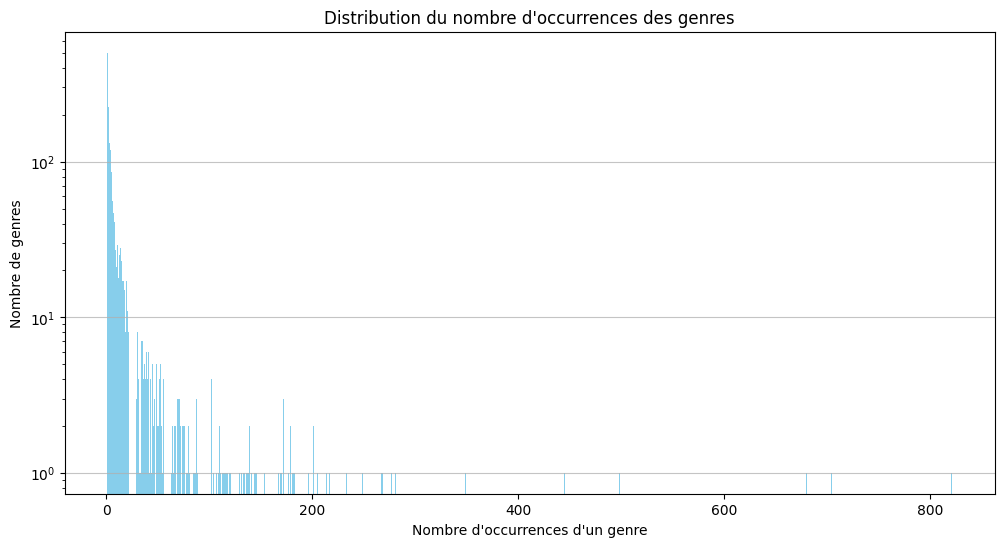

0.28767908309455587

In [ ]:
import ast
from collections import Counter

df_genre = df.copy()

# Conversion des chaînes en listes
df_genre['genres'] = df_genre['genres'].apply(ast.literal_eval)

# Compter les occurrences de chaque genre
all_genres_list = [genre for sublist in df_genre['genres'] for genre in sublist]
genre_counts = Counter(all_genres_list)
# Filtrer les genres rares
rare_genres = {genre: count for genre, count in genre_counts.items() if count <= 1}

# Afficher le nombre de genres rares
print(f"Nombre de genres rares (< 10 occurrences) : {len(rare_genres)}")

# Afficher les genres rares et leur nombre d'occurrences
print("Liste des genres rares et leur nombre d'occurrences :")
for genre, count in rare_genres.items():
    print(f"{genre}: {count}")
# Compter combien de genres ont 1, 2, 3... occurrences
occurrence_distribution = Counter(genre_counts.values())

# Tracer le graphique
x = sorted(occurrence_distribution.keys())
y = [occurrence_distribution[k] for k in x]

plt.figure(figsize=(12, 6))
plt.bar(x, y, color='skyblue')
plt.xlabel("Nombre d'occurrences d'un genre")
plt.ylabel("Nombre de genres")
plt.title("Distribution du nombre d'occurrences des genres")
plt.yscale('log')
plt.grid(axis='y', alpha=0.75)
plt.show()
502/1745

beacoup de genres(42%) sont tres rares et n'apparaissent qu'une ou deux fois et 72% des genres apparaissent moins de 10 fois pour 8700 sons soit 14% des musiques ont un genre quasi unique. Pour cela, je propose de regrouper ces genres vers des genres proches pour regrouper des caractéristiques similaires.
Une idée pourrait de classifier grace a notre précédent classifier grossierement qui aurait l'interer de les rapprocher vers des genres plus gros mais proches.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

class MusicFeatureEngineering():
    def __init__(self):
        self.min_date_ = None

    def fit(self, X, y=None):
        self.min_date_ = pd.Timestamp('1900-01-01')#la date minimale
        return self

    def transform(self, X):
        X_copy = X.copy()
        
        X_copy['release_date'] = pd.to_datetime(X_copy['release_date'], format='mixed')
        X_copy['days_since_1900'] = (X_copy['release_date'] - self.min_date_).dt.days
        X_copy['genres'] = X_copy['genres'].apply(ast.literal_eval)

        cols_to_drop = ['release_date','id','track_name']
        X_copy = X_copy.drop(columns=[c for c in cols_to_drop if c in X_copy.columns])
        numeric_features = X_copy.select_dtypes(include=[np.number]).columns.tolist()
        print (numeric_features)
        categorical_features = X_copy.select_dtypes(include=['object', 'category','bool']).columns.tolist()
        categorical_features.remove('genres')  # Enlever la colonne target
        # Encoder chaque feature catégorique
        label_encoders = {}
        for col in categorical_features:
            le = LabelEncoder()
            X_copy[col] = le.fit_transform(X_copy[col].astype(str))
            label_encoders[col] = le
        return X_copy

X = df

pipeline_X = Pipeline([
    ('feature_eng', MusicFeatureEngineering())])

X_processed = pipeline_X.fit_transform(X)
X_processed.head()

['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'days_since_1900']


,artist_name,genres,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,days_since_1900
0,2908,"[discofox, partyschlager, schlager]",0,42,0.728,0.936,6,-2.557,1,0.1690,0.036800,0.000000,0.323,0.509,144.968,174631,4,43383
1,55,"[europop, swedish pop]",0,75,0.500,0.554,9,-8.108,1,0.0354,0.734000,0.000004,0.312,0.372,84.229,326320,4,28854
2,1336,[deep punk rock],0,0,0.149,0.802,1,-9.954,1,0.0465,0.187000,0.785000,0.356,0.478,185.689,277053,4,40397
3,115,"[bebop, cool jazz, jazz, jazz piano]",0,0,0.604,0.622,9,-9.277,1,0.0282,0.495000,0.661000,0.873,0.570,97.980,487201,4,21326
4,2514,"[alternative metal, funk metal, nu metal, rap ...",1,0,0.527,0.792,11,-6.693,0,0.0363,0.000122,0.037000,0.249,0.424,110.038,235493,4,36463


In [859]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from collections import Counter

all_features = X_processed.drop('genres',axis=1).columns
numeric_features = ['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'days_since_1900']

# ============================================================================
# ÉTAPE 3 : Créer un profil moyen pour chaque genre
# ============================================================================

# Exploser les listes de genres (une ligne par genre)
df_exploded = X_processed.explode('genres')
# Calculer les statistiques moyennes par genre
genre_profiles = df_exploded.groupby('genres')[numeric_features].agg(['mean', 'std', 'median'])

# Aplatir les colonnes multi-index
genre_profiles.columns = ['_'.join(col).strip() for col in genre_profiles.columns.values]
genre_profiles = genre_profiles.fillna(0)

print(f"\nShape des profils de genres: {genre_profiles.shape}")
print(f"Nombre de genres uniques: {len(genre_profiles)}")
genre_profiles.head()



Shape des profils de genres: (1745, 45)
Nombre de genres uniques: 1745


,popularity_mean,popularity_std,popularity_median,danceability_mean,danceability_std,danceability_median,energy_mean,energy_std,energy_median,key_mean,...,tempo_median,duration_ms_mean,duration_ms_std,duration_ms_median,time_signature_mean,time_signature_std,time_signature_median,days_since_1900_mean,days_since_1900_std,days_since_1900_median
genres,,,,,,,,,,,,,,,,,,,,,
a cappella,49.000000,0.000000,49.0,0.598000,0.000000,0.5980,0.828000,0.000000,0.8280,2.000000,...,130.0640,147293.000000,0.000000,147293.0,4.0,0.000000,4.0,42133.0,0.000000,42133.0
abstract,13.833333,12.765840,9.5,0.466667,0.222919,0.5205,0.630333,0.186828,0.5610,4.666667,...,144.3235,358338.833333,50301.308235,349710.0,4.0,0.000000,4.0,39558.0,2859.172538,38699.5
abstract beats,33.500000,6.191392,32.0,0.723250,0.071365,0.7035,0.911750,0.086094,0.9405,9.000000,...,113.0075,200286.750000,11589.955518,199898.5,4.0,0.000000,4.0,43302.5,749.065418,43036.5
abstract hip hop,9.500000,13.435029,9.5,0.668000,0.101823,0.6680,0.712000,0.005657,0.7120,5.500000,...,96.7375,222053.000000,33771.419869,222053.0,4.0,0.000000,4.0,41229.0,62.225397,41229.0
acid house,15.800000,21.776134,0.0,0.661000,0.112374,0.6720,0.872600,0.065037,0.8830,7.400000,...,124.9900,344333.000000,118799.002746,306231.0,3.8,0.447214,4.0,37394.8,3991.074943,37884.0


In [860]:
# ============================================================================
# ÉTAPE 4 : Normaliser les profils
# ============================================================================

scaler = StandardScaler()
genre_profiles_scaled = scaler.fit_transform(genre_profiles)

# Optionnel : Réduction de dimension avec PCA pour visualisation
pca = PCA(n_components=0.95)
genre_profiles_pca = pca.fit_transform(genre_profiles_scaled)
print(f"Variance expliquée par PCA: {pca.explained_variance_ratio_.sum():.2%}")
genre_profiles_pca.shape


Variance expliquée par PCA: 95.51%


(1745, 24)

In [861]:
from sklearn.cluster import KMeans

# On demande arbitrairement 8 grands genres musicaux
n_clusters = 8 
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(genre_profiles_scaled)

# Mise à jour dans le DataFrame des profils
genre_profiles['cluster'] = clusters

# --- Visualisation des résultats K-Means ---
# On regarde quel genre domine chaque cluster pour le nommer
print(f"\n--- Analyse des {n_clusters} Clusters K-Means ---")
for i in range(n_clusters):
    # On prend les genres qui sont dans ce cluster
    cluster_indices = genre_profiles[genre_profiles['cluster'] == i].index
    
    # On regarde la taille
    size = len(cluster_indices)
    
    # On affiche 5 exemples pour voir si ça a du sens
    examples = list(cluster_indices[:5])
    print(f"Cluster {i}: {size} genres. Exemples: {examples}")


--- Analyse des 8 Clusters K-Means ---
Cluster 0: 282 genres. Exemples: ['acid rock', 'acoustic pop', 'afro-cuban traditional', 'afrobeat', 'afrofuturism']
Cluster 1: 388 genres. Exemples: ['abstract', 'abstract beats', 'abstract hip hop', 'acid house', 'acid techno']
Cluster 2: 147 genres. Exemples: ['acid jazz', 'acid trance', 'alabama indie', 'anime', 'anime lo-fi']
Cluster 3: 126 genres. Exemples: ['alternative pop', 'anarcho-punk', 'argentine punk', 'atlanta indie', 'australian alternative rock']
Cluster 4: 212 genres. Exemples: ['acoustic blues', 'adult standards', 'african-american classical', 'afro-cuban percussion', 'alternative americana']
Cluster 5: 349 genres. Exemples: ['a cappella', 'acousmatic', 'african percussion', 'african rock', 'ai']
Cluster 6: 182 genres. Exemples: ['aesthetic rap', 'african reggae', 'alabama rap', 'alternative hip hop', 'alternative r&b']
Cluster 7: 59 genres. Exemples: ['american contemporary classical', 'australian ambient', 'background jazz', 

In [862]:
import pandas as pd
import ast
from collections import Counter

# ============================================================================
# ÉTAPE PRÉLIMINAIRE : Correction du format des données
# ============================================================================

# Fonction de sécurité pour convertir les chaînes en listes
def safe_literal_eval(val):
    if isinstance(val, str):
        try:
            return ast.literal_eval(val)
        except (ValueError, SyntaxError):
            return [] # Retourne une liste vide en cas d'erreur
    return val # Si c'est déjà une liste, on ne touche à rien

# On applique la conversion sur la colonne genres de X si ce n'est pas déjà fait
# Cela corrige le problème des caractères individuels [l, g, x...]
X['genres'] = X['genres'].apply(safe_literal_eval)

# ============================================================================
# ÉTAPE 6 : Créer le mapping de regroupement
# ============================================================================

# Pour chaque cluster, choisir le genre le plus fréquent comme représentant
# Maintenant que X['genres'] est une vraie liste, cette boucle fonctionnera correctement
all_genres = [genre for genres_list in X['genres'] if isinstance(genres_list, list) for genre in genres_list]
genre_counts = Counter(all_genres)

genre_mapping = {}

# On s'assure que clusters est bien défini (issu de votre DBSCAN précédent)
unique_clusters = set(clusters)

for cluster_id in unique_clusters:
    # Récupérer les genres appartenant à ce cluster
    genres_in_cluster = genre_profiles[genre_profiles['cluster'] == cluster_id].index.tolist()
    
    if not genres_in_cluster:
        continue

    if cluster_id == -1:  # Genres isolés (Bruit)
        # Les garder tels quels ou les mapper vers "Other" selon leur fréquence globale
        for genre in genres_in_cluster:
            # Si le genre est très rare globalement, on le met dans "Other"
            if genre_counts[genre] < 10: 
                genre_mapping[genre] = 'Other'
            else:
                genre_mapping[genre] = genre
    else:
        # Trouver le genre le plus fréquent PARMI ceux du cluster
        # On utilise genre_counts pour pondérer
        most_common = max(genres_in_cluster, key=lambda g: genre_counts[g])
        
        # Mapper tous les genres du cluster vers ce genre dominant
        for genre in genres_in_cluster:
            genre_mapping[genre] = most_common
# ============================================================================
# ÉTAPE 7 (Corrigée) : Application avec réduction drastique
# ============================================================================

# 1. On recalcule la fréquence globale de chaque "super-genre" pour établir une hiérarchie
# Cela nous servira à dire : "Si j'hésite entre Rock et Dutch DnB, je prends Rock car c'est plus commun"
all_mapped_genres = []
for genres_list in X['genres']:
    if isinstance(genres_list, list):
        # On regarde vers quoi chaque genre pointerait
        mapped_temp = [genre_mapping.get(g, g) for g in genres_list]
        all_mapped_genres.extend(mapped_temp)

target_counts = Counter(all_mapped_genres)

def get_primary_genre(genres_list):
    if not isinstance(genres_list, list) or not genres_list:
        return 'Other'
    
    # 1. Appliquer le mapping
    # Ex: ['classic rock', 'rare_genre'] devient ['rock', 'Other']
    mapped_set = {genre_mapping.get(g, g) for g in genres_list}
    
    # 2. Nettoyage de "Other"
    # Si on a ['rock', 'Other'], on supprime 'Other' pour ne garder que l'info utile
    if 'Other' in mapped_set and len(mapped_set) > 1:
        mapped_set.remove('Other')
    
    # 3. Sélection du vainqueur
    # S'il reste ['rock', 'pop'], on prend celui qui est le plus fréquent dans tout le dataset
    # Cela permet d'éliminer les sous-genres bizarres qui auraient survécu (ex: 'british modern classical')
    # au profit du genre majeur s'il est présent.
    primary_genre = max(mapped_set, key=lambda g: target_counts.get(g, 0))
    
    return primary_genre

# Application : Cela renverra une string unique au lieu d'une liste
X_processed['primary_genre'] = X['genres'].apply(get_primary_genre)

# ============================================================================
# VÉRIFICATION
# ============================================================================

print(f"\n rérpartition des genres principaux :")
print(X_processed['primary_genre'].value_counts().head(15))

# Vérification sur vos exemples problématiques
test_cases = [
    ['rock', 'british modern classical'],
    ['dutch dnb', 'rock'],
    ['focus', 'Other'],
    ['Other', 'rock']
]

print(f"\n Test sur les cas problématiques :")
for test in test_cases:
    print(f"Origine: {test} -> Résultat: {get_primary_genre(test)}")


 rérpartition des genres principaux :
primary_genre
rock                 3356
pop                  2375
rap                  1052
Other                 945
adult standards       483
punk                  294
classical             108
bakersfield sound      63
jazz rock              22
Name: count, dtype: int64

 Test sur les cas problématiques :
Origine: ['rock', 'british modern classical'] -> Résultat: rock
Origine: ['dutch dnb', 'rock'] -> Résultat: rock
Origine: ['focus', 'Other'] -> Résultat: classical
Origine: ['Other', 'rock'] -> Résultat: rock


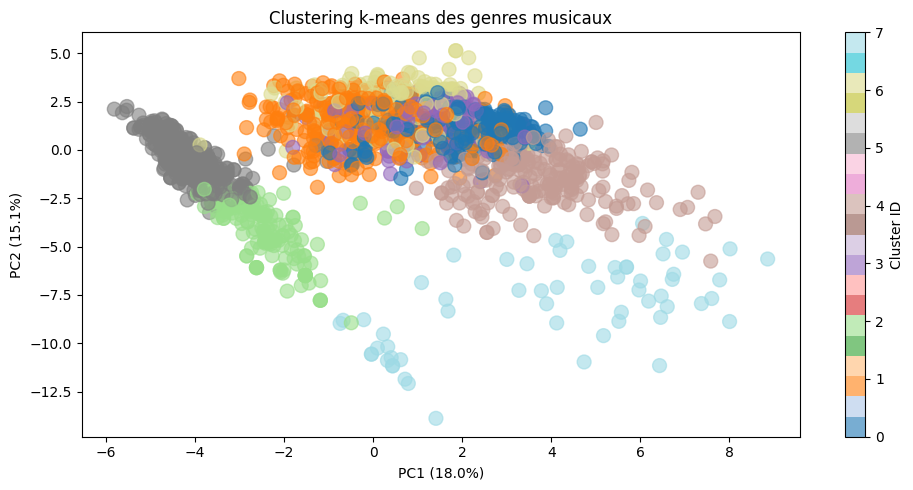

In [863]:


# ============================================================================
# ÉTAPE 8 : Visualisation (optionnel)
# ============================================================================

plt.figure(figsize=(10, 5))
scatter = plt.scatter(
    genre_profiles_pca[:, 0], 
    genre_profiles_pca[:, 1],
    c=clusters,
    cmap='tab20',
    s=100,
    alpha=0.6
)

plt.colorbar(scatter, label='Cluster ID')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
plt.title('Clustering k-means des genres musicaux')
plt.tight_layout()
plt.show()

In [864]:
X_processed['primary_genre'].value_counts()

primary_genre
rock                 3356
pop                  2375
rap                  1052
Other                 945
adult standards       483
punk                  294
classical             108
bakersfield sound      63
jazz rock              22
Name: count, dtype: int64

## prediction de popularité

In [865]:
X_processed.head()

,artist_name,genres,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,days_since_1900,primary_genre
0,2908,"[discofox, partyschlager, schlager]",0,42,0.728,0.936,6,-2.557,1,0.1690,0.036800,0.000000,0.323,0.509,144.968,174631,4,43383,pop
1,55,"[europop, swedish pop]",0,75,0.500,0.554,9,-8.108,1,0.0354,0.734000,0.000004,0.312,0.372,84.229,326320,4,28854,rock
2,1336,[deep punk rock],0,0,0.149,0.802,1,-9.954,1,0.0465,0.187000,0.785000,0.356,0.478,185.689,277053,4,40397,punk
3,115,"[bebop, cool jazz, jazz, jazz piano]",0,0,0.604,0.622,9,-9.277,1,0.0282,0.495000,0.661000,0.873,0.570,97.980,487201,4,21326,adult standards
4,2514,"[alternative metal, funk metal, nu metal, rap ...",1,0,0.527,0.792,11,-6.693,0,0.0363,0.000122,0.037000,0.249,0.424,110.038,235493,4,36463,rock


In [866]:
X_processed_reg = X_processed.drop('genres',axis=1)
y = X_processed_reg['popularity'] 
X_processed_reg= X_processed_reg.drop('popularity',axis=1)
le = LabelEncoder()
X_processed_reg['primary_genre']= le.fit_transform(X_processed_reg['primary_genre'].astype(str))
X_processed_reg.head()


,artist_name,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,days_since_1900,primary_genre
0,2908,0,0.728,0.936,6,-2.557,1,0.1690,0.036800,0.000000,0.323,0.509,144.968,174631,4,43383,5
1,55,0,0.500,0.554,9,-8.108,1,0.0354,0.734000,0.000004,0.312,0.372,84.229,326320,4,28854,8
2,1336,0,0.149,0.802,1,-9.954,1,0.0465,0.187000,0.785000,0.356,0.478,185.689,277053,4,40397,6
3,115,0,0.604,0.622,9,-9.277,1,0.0282,0.495000,0.661000,0.873,0.570,97.980,487201,4,21326,1
4,2514,1,0.527,0.792,11,-6.693,0,0.0363,0.000122,0.037000,0.249,0.424,110.038,235493,4,36463,8


In [867]:
# split 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed_reg, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler

# C'est important de fit uniquement sur le train pour éviter la fuite de données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [868]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, r2_score
# Initialisation (n_estimators=100 est le nombre d'arbres)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Entraînement
rf_model.fit(X_train, y_train)

# Prédiction
y_pred_rf = rf_model.predict(X_test)

# Évaluation
rmse = root_mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)
print(f"Random Forest -> RMSE: {rmse:.2f}, R2: {r2:.3f}")

Random Forest -> RMSE: 22.75, R2: 0.246


In [869]:
from sklearn.ensemble import HistGradientBoostingRegressor

# Initialisation
gb_model = HistGradientBoostingRegressor(random_state=42)

# Entraînement
gb_model.fit(X_train, y_train)

# Prédiction
y_pred_gb = gb_model.predict(X_test)

# Évaluation
rmse = root_mean_squared_error(y_test, y_pred_gb)
r2 = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting -> RMSE: {rmse:.2f}, R2: {r2:.3f}")

Gradient Boosting -> RMSE: 22.48, R2: 0.264


In [870]:
from sklearn.neighbors import KNeighborsRegressor

# Initialisation (on regarde les 10 voisins les plus proches)
knn_model = KNeighborsRegressor(n_neighbors=10)

# Entraînement (sur données SCALED impérativement)
knn_model.fit(X_train_scaled, y_train)

# Prédiction
y_pred_knn = knn_model.predict(X_test_scaled)

# Évaluation
rmse = root_mean_squared_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)
print(f"KNN -> RMSE: {rmse:.2f}, R2: {r2:.3f}")

KNN -> RMSE: 24.59, R2: 0.119
